# Riyadh Metro Stations — EDA & Clustering

**Goal:** Explore Riyadh Metro stations, understand spatial/rating patterns, and group stations using **K-Means**.

**Dataset:** 88 stations with location, rating, and metadata  
**Key columns:** `Station_Name`, `Latitude`, `Longitude`, `Rating`, `Metro line name`, `Metro line number`, `Station type`, `Number_of_Ratings`, `Type_of_Utility`

**Pipeline**
1) Data & Methods (setup, loading, cleaning)
2) EDA (structure, missing values, distributions)
3) Modeling (K-Means on coordinates)
4) Evaluation (silhouette, cluster sizes)
5) Map/Viz (interactive cluster map)
6) Conclusions (insights & next steps)


In [118]:
# Core
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import plotly.express as px

# Modeling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Data Loading & Cleaning

- Load CSV
- Standardize column names
- Ensure numeric dtypes for Latitude/Longitude/Rating
- Confirm no missing/duplicates (dataset is already clean)


In [119]:
# Reading the data
df = pd.read_csv("/content/Cleaned_Dataset_Riyadh-Metro-Stations.csv")

print("Shape:", df.shape)
print("Columns:", list(df.columns))
display(df.head(10))

Shape: (88, 10)
Columns: ['Station_Name', 'Type_of_Utility', 'Number_of_Ratings', 'Longitude', 'Latitude', 'Metro line number', 'Metro line name', 'Station type', 'Match_Method', 'Rating']


,Station_Name,Type_of_Utility,Number_of_Ratings,Longitude,Latitude,Metro line number,Metro line name,Station type,Match_Method,Rating
0,Abu Dhabi square,Metro Station,6,46.716320,24.706055,Line5,Green line,Deep Underground,exact/alias,4.2
1,Ad Dar Al Baida,Metro Station,8,46.776301,24.559996,Line1,Blue line,Elevated,exact/alias,4.9
2,Ad Dhabab,Metro Station,1,46.707526,24.709760,Line5,Green line,Deep Underground,exact/alias,5.0
3,Ad Douh,Metro Station,3,46.588329,24.582748,Line3,Orange line,Elevated,exact/alias,5.0
4,Airport T1-2,Metro Station,4,46.698992,24.960999,Line4,Yellow line,Elevated,exact/alias,2.5
5,Airport T3-4,Metro Station,6,46.702253,24.955990,Line4,Yellow line,Elevated,exact/alias,4.7
6,Airport T5,Metro Station,2,46.710230,24.940800,Line4,Yellow line,Elevated,exact/alias,5.0
7,Aishah bint Abi Bakr Street,Metro Station,1,46.643799,24.600563,Line3,Orange line,Elevated,exact/alias,5.0
8,Al Andalus,Metro Station,0,46.790351,24.756780,Line6,Purple line,Elevated,exact/alias,0.0
9,Al Aziziah,Metro Station,1,46.760823,24.587257,Line1,Blue line,Elevated,exact/alias,4.0


In [120]:
# Strip station names
if "Station_Name" in df.columns:
    df["Station_Name"] = df["Station_Name"].astype(str).str.strip()

print("Missing values per column:")
print(df.isna().sum().sort_values(ascending=False))

print("\nDuplicate full rows:", df.duplicated().sum())
print("Duplicate by (Station_Name, Latitude, Longitude):",
      df.duplicated(subset=["Station_Name","Latitude","Longitude"]).sum())

Missing values per column:
Station_Name         0
Type_of_Utility      0
Number_of_Ratings    0
Longitude            0
Latitude             0
Metro line number    0
Metro line name      0
Station type         0
Match_Method         0
Rating               0
dtype: int64

Duplicate full rows: 0
Duplicate by (Station_Name, Latitude, Longitude): 0


## Exploratory Data Analysis (EDA)

- Structure & missing
- Rating distribution
- Top/low-rated stations
- Counts per line / station type


In [95]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station_Name       88 non-null     object 
 1   Type_of_Utility    88 non-null     object 
 2   Number_of_Ratings  88 non-null     int64  
 3   Longitude          88 non-null     float64
 4   Latitude           88 non-null     float64
 5   Metro line number  88 non-null     object 
 6   Metro line name    88 non-null     object 
 7   Station type       88 non-null     object 
 8   Match_Method       88 non-null     object 
 9   Rating             88 non-null     float64
dtypes: float64(3), int64(1), object(6)
memory usage: 7.0+ KB
None


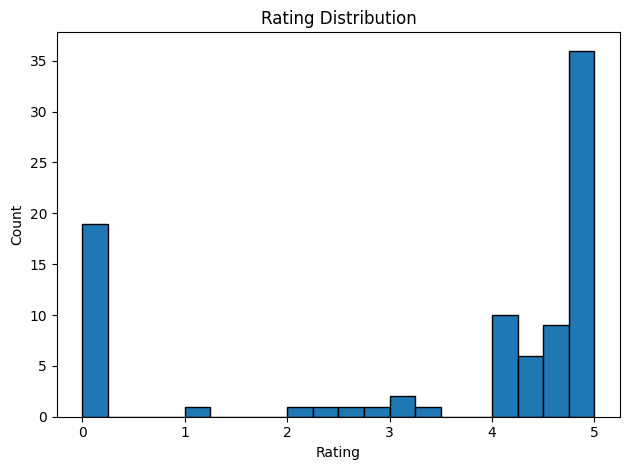

In [126]:
plt.figure()
df["Rating"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



1.   How many stations are there in total?




In [121]:
total_stations = df["Station_Name"].nunique()
print("\nTotal unique stations:", total_stations)


# Visualization using plotly:
fig_plotly = px.scatter_mapbox(
    df,
    lat="Latitude", lon="Longitude",
    hover_name="Station_Name",
    zoom=10, height=520,
    title="Riyadh Metro Stations"
)
fig_plotly.update_layout(mapbox_style="open-street-map", margin=dict(l=0,r=0,t=40,b=0))
fig_plotly.show()

# Visualization using heatmap:
fig_heatmap = px.density_mapbox(
    df,
    lat="Latitude", lon="Longitude",
    radius=20,
    zoom=10, height=520,
    title="Station Density (Heatmap)"
)
fig_heatmap.update_layout(mapbox_style="open-street-map", margin=dict(l=0,r=0,t=40,b=0))
fig_heatmap.show()


Total unique stations: 88


2. Which areas have the highest concentration of stations?

In [124]:
# Visualization: station density across Riyadh
fig_heatmap = px.density_mapbox(
    df,
    lat="Latitude", lon="Longitude",
    radius=20,
    zoom=10, height=520,
    title="Station Density Across Riyadh"
)
fig_heatmap.update_layout(mapbox_style="open-street-map", margin=dict(l=0,r=0,t=40,b=0))
fig_heatmap.show()

3. What is the overall distribution of station ratings?



In [ ]:
print(df["Rating"].describe())

# Visualization using heatmap:
fig_rating_density = px.density_mapbox(
    df.dropna(subset=["Rating"]),
    lat="Latitude", lon="Longitude",
    z="Rating",
    radius=25, zoom=10, height=520,
    title="Heatmap Weighted by Station Ratings"
)
fig_rating_density.update_layout(mapbox_style="open-street-map", margin=dict(l=0,r=0,t=40,b=0))
fig_rating_density.show()


count    88.000000
mean      3.499549
std       1.987162
min       0.000000
25%       2.450000
50%       4.500000
75%       5.000000
max       5.000000
Name: Rating, dtype: float64


4. Which stations have the highest and lowest ratings, and where are they?

In [ ]:
# Get Top 10 and lower 10
top10 = df.sort_values("Rating", ascending=False).head(10)
low10 = df.sort_values("Rating", ascending=True).head(10)

print("Top 10 rated stations:")
print(top10[["Station_Name","Rating"]])
print("\nlowest 10 rated stations:")
print(low10[["Station_Name","Rating"]])

# Visualization using plotly:
fig_rating = px.scatter_mapbox(
    df, lat="Latitude", lon="Longitude",
    hover_name="Station_Name",
    color="Rating",
    color_continuous_scale="Viridis",
    zoom=10, height=520,
    title="Station Ratings on the Map"
)
fig_rating.update_layout(mapbox_style="open-street-map", margin=dict(l=0,r=0,t=40,b=0))
fig_rating.show()

# Visualization Map:
highlighted = (
    pd.concat([top10.assign(Group="Top 10"), low10.assign(Group="Lower 10")])
    .reset_index(drop=True)
)

fig_map = px.scatter_mapbox(
    highlighted, lat="Latitude", lon="Longitude",
    color="Group", hover_name='Station_Name',
    size="Rating",
    zoom=10, height=520,
    title="Top 10 (Green) vs Bottom 10 (Red) Rated Stations"
)
fig_map.update_layout(mapbox_style="open-street-map", margin=dict(l=0,r=0,t=40,b=0))
fig_map.show()

# Visualization Bar chart:
fig_bar = px.bar(
    highlighted, x="Rating", y='Station_Name',
    color="Group", orientation="h",
    title="Top 10 vs Lowest 10 Station Ratings",
    text="Rating"
)
fig_bar.update_traces(textposition="outside")
fig_bar.update_layout(height=600, yaxis={'categoryorder':'total ascending'})
fig_bar.show()


Top 10 rated stations:
                   Station_Name  Rating
3                       Ad Douh     5.0
2                     Ad Dhabab     5.0
6                    Airport T5     5.0
7   Aishah bint Abi Bakr Street     5.0
12                     Al Hilla     5.0
13             Al Iman Hospital     5.0
15                   Al Khaleej     5.0
10                    Al Bat’ha     5.0
16                     Al Malaz     5.0
57        King Fahad Sport City     5.0

lowest 10 rated stations:
             Station_Name  Rating
11               Al Hamra     0.0
14          Al Jarradiyah     0.0
8              Al Andalus     0.0
30                Ar Rabi     0.0
20                 Al Owd     0.0
21  Al Rajhi Grand Mosque     0.0
18            Al Muorabba     0.0
17              Al Margab     0.0
50           Khashm Al An     0.0
42   Harun ar Rashid Road     0.0


5. How does the overall distribution support city-wide coverage?

In [127]:
# City-wide density of metro stations
fig_citywide = px.density_mapbox(
    df, lat="Latitude", lon="Longitude",
    radius=30, zoom=8, height=520,
    title="City-Wide Metro Station Coverage"
)
fig_citywide.update_layout(mapbox_style="open-street-map", margin=dict(l=0,r=0,t=40,b=0))
fig_citywide.show()

6. Which side of Riyadh (north, south, east, west) has better metro coverage?

In [128]:
# Used ready to use code to find me the coverage
# Define city center (approx Riyadh center)
center_lat, center_lon = 24.7136, 46.6753

# Assign quadrants relative to city center
conditions = [
    (df["Latitude"] >= center_lat) & (df["Longitude"] >= center_lon),  # NE
    (df["Latitude"] >= center_lat) & (df["Longitude"] <  center_lon),  # NW
    (df["Latitude"] <  center_lat) & (df["Longitude"] <  center_lon),  # SW
    (df["Latitude"] <  center_lat) & (df["Longitude"] >= center_lon),  # SE
]
choices = ["Northeast", "Northwest", "Southwest", "Southeast"]

df["Quadrant"] = np.select(conditions, choices, default="Unclassified")  # 👈 default is a string
print(df["Quadrant"].value_counts())


# Visualization using heatmap:
fig_quadrant = px.density_mapbox(
    df, lat="Latitude", lon="Longitude",
    radius=20, zoom=10, height=520,
    title="Metro Coverage by Quadrant of Riyadh",
    color_continuous_scale="Blues"
)
fig_quadrant.update_layout(mapbox_style="open-street-map", margin=dict(l=0,r=0,t=40,b=0))
fig_quadrant.show()

# Visualization using bar:
counts = df["Quadrant"].value_counts()
print("Stations per quadrant:\n", counts)

fig_counts = px.bar(
    counts, x=counts.index, y=counts.values,
    text=counts.values,
    title="Station Counts per Quadrant"
)
fig_counts.update_traces(textposition="outside")
fig_counts.show()


Quadrant
Southeast    39
Northeast    26
Northwest    15
Southwest     8
Name: count, dtype: int64


Stations per quadrant:
 Quadrant
Southeast    39
Northeast    26
Northwest    15
Southwest     8
Name: count, dtype: int64


# Model: K-Means clustering

## Modeling: K-Means on (Latitude, Longitude)

- Try multiple k values
- Choose k by silhouette score
- Fit final model and assign cluster labels


In [106]:
coords = df[["Latitude","Longitude"]].to_numpy()
print("Coordinate sample:", coords[:])

Coordinate sample: [[24.7060545  46.7163204 ]
 [24.5599956  46.7763009 ]
 [24.7097595  46.7075259 ]
 [24.5827481  46.5883285 ]
 [24.9609991  46.6989919 ]
 [24.9559904  46.7022528 ]
 [24.9408001  46.7102298 ]
 [24.6005633  46.6437994 ]
 [24.7567803  46.7903506 ]
 [24.5872573  46.760823  ]
 [24.6369127  46.7147124 ]
 [24.775949   46.7766872 ]
 [24.6322502  46.721881  ]
 [24.6005143  46.7358408 ]
 [24.6182534  46.6974109 ]
 [24.7818785  46.7940337 ]
 [24.6614228  46.7447701 ]
 [24.6344958  46.7263187 ]
 [24.6648026  46.7022887 ]
 [24.7545288  46.6544534 ]
 [24.6255297  46.7215127 ]
 [24.6801982  46.779454  ]
 [24.7133582  46.6752135 ]
 [24.6760189  46.7183955 ]
 [24.7332599  46.6770012 ]
 [24.7210533  46.6713508 ]
 [24.7912982  46.7662398 ]
 [24.702986   46.6804148 ]
 [24.7004315  46.8275319 ]
 [24.7480677  46.712269  ]
 [24.7862174  46.6601128 ]
 [24.7226689  46.8112903 ]
 [24.6377619  46.7329123 ]
 [24.712787   46.7003484 ]
 [24.7237623  46.654669  ]
 [24.6966365  46.6836577 ]
 [24.6267

k vs Silhouette: [(3, np.float64(0.34720902281655147)), (4, np.float64(0.45536578345971657)), (5, np.float64(0.48966303784685894)), (6, np.float64(0.46869235954021077)), (7, np.float64(0.45768889108049843))]


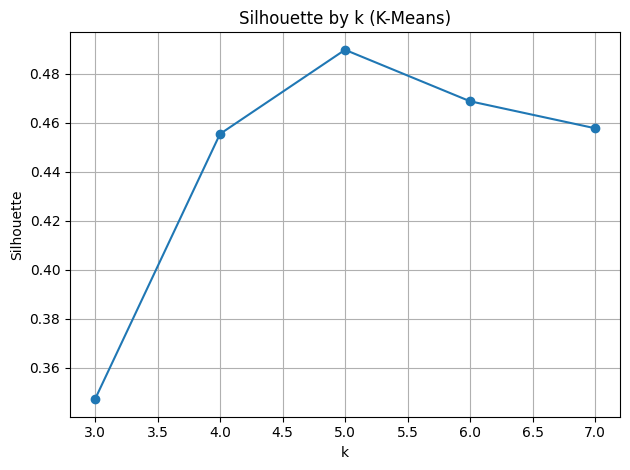

Best k=5 (silhouette=0.490)


In [107]:
candidate_k = [3,4,5,6,7]
sil_scores = []

for kk in candidate_k:
    km = KMeans(n_clusters=kk, random_state=42, n_init="auto")
    labels = km.fit_predict(coords)
    sil = silhouette_score(coords, labels)
    sil_scores.append((kk, sil))

print("k vs Silhouette:", sil_scores)

# Plot silhouette vs k
plt.figure()
plt.plot([x[0] for x in sil_scores], [x[1] for x in sil_scores], marker="o")
plt.title("Silhouette by k (K-Means)")
plt.xlabel("k"); plt.ylabel("Silhouette")
plt.grid(True); plt.tight_layout(); plt.show()

best_k, best_sil = max(sil_scores, key=lambda x: x[1])
print(f"Best k={best_k} (silhouette={best_sil:.3f})")


In [109]:
final_k = best_k
km = KMeans(n_clusters=final_k, random_state=42, n_init="auto")
df["Cluster"] = km.fit_predict(coords)

centroids = km.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=["Latitude","Longitude"])
centroids_df["Cluster"] = range(final_k)

display(df.head())
display(centroids_df)

,Station_Name,Type_of_Utility,Number_of_Ratings,Longitude,Latitude,Metro line number,Metro line name,Station type,Match_Method,Rating,Cluster
0,Abu Dhabi square,Metro Station,6,46.716320,24.706055,Line5,Green line,Deep Underground,exact/alias,4.2,3
1,Ad Dar Al Baida,Metro Station,8,46.776301,24.559996,Line1,Blue line,Elevated,exact/alias,4.9,0
2,Ad Dhabab,Metro Station,1,46.707526,24.709760,Line5,Green line,Deep Underground,exact/alias,5.0,3
3,Ad Douh,Metro Station,3,46.588329,24.582748,Line3,Orange line,Elevated,exact/alias,5.0,4
4,Airport T1-2,Metro Station,4,46.698992,24.960999,Line4,Yellow line,Elevated,exact/alias,2.5,2


,Latitude,Longitude,Cluster
0,24.640791,46.726219,0
1,24.749447,46.805786,1
2,24.903729,46.712037,2
3,24.745792,46.674166,3
4,24.591485,46.600610,4


## Evaluation

- Final silhouette
- Cluster sizes
- Sample stations per cluster
- Compare ratings by cluster


In [111]:
final_sil = silhouette_score(coords, df["Cluster"])
print(f"Final silhouette (k={final_k}): {final_sil:.3f}")

sizes = df["Cluster"].value_counts().sort_index()
print("\nCluster sizes:")
display(sizes.to_frame("count"))

Final silhouette (k=5): 0.490

Cluster sizes:


,count
Cluster,
0,30
1,13
2,6
3,33
4,6


In [113]:
examples = (
    df.groupby("Cluster")
      .apply(lambda g: g[["Station_Name","Latitude","Longitude","Metro line number","Rating"]]
             .head(5)
             .reset_index(drop=True))
)
print("Sample stations per cluster (first 5 each):")
display(examples)

Sample stations per cluster (first 5 each):


/tmp/ipython-input-2631640392.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Station_Name   Latitude  Longitude  \
Cluster                                                        
0       0              Ad Dar Al Baida  24.559996  46.776301   
        1                   Al Aziziah  24.587257  46.760823   
        2                    Al Bat’ha  24.636913  46.714712   
        3                     Al Hilla  24.632250  46.721881   
        4             Al Iman Hospital  24.600514  46.735841   
1       0                   Al Andalus  24.756780  46.790351   
        1                     Al Hamra  24.775949  46.776687   
        2                   Al Khaleej  24.781879  46.794034   
        3                    Al Yarmuk  24.791298  46.766240   
        4                    An Naseem  24.700432  46.827532   
2       0                 Airport T1-2  24.960999  46.698992   
        1                 Airport T3-4  24.955990  46.702253   
        2                   Airport T5  24.940800  46.710230   
        3             Metro Station F2  24.864254  46.724367   
        4                         PNU1  24.842719  46.721226   
3       0             Abu Dhabi square  24.706055  46.716320   
        1                    Ad Dhabab  24.709760  46.707526   
        2                    Al Murooj  24.754529  46.654453   
        3                    Al Urubah  24.713358  46.675213   
        4                     Al Wurud  24.733260  46.677001   
4       0                      Ad Douh  24.582748  46.588329   
        1  Aishah bint Abi Bakr Street  24.600563  46.643799   
        2            Dhahrat Al Badiah  24.606738  46.653789   
        3                  Jeddah Road  24.591448  46.543547   
        4                       Tuwaiq  24.585468  46.559699   

          Metro line number    Rating  
Cluster                                
0       0             Line1  4.900000  
        1             Line1  4.000000  
        2             Line1  5.000000  
        3             Line3  5.000000  
        4             Line1  5.000000  
1       0             Line6  0.000000  
        1             Line6  0.000000  
        2             Line2  5.000000  
        3             Line6  5.000000  
        4             Line6  4.400000  
2       0             Line4  2.500000  
        1             Line4  4.700000  
        2             Line4  5.000000  
        3             Line4  4.200000  
        4             Line4  4.151648  
3       0             Line5  4.200000  
        1             Line5  5.000000  
        2             Line1  3.000000  
        3             Line1  3.000000  
        4             Line2  5.000000  
4       0             Line3  5.000000  
        1             Line3  5.000000  
        2             Line3  4.300000  
        3             Line3  4.000000  
        4             Line3  5.000000

In [114]:
if "Rating" in df.columns:
    by_cluster = df.groupby("Cluster")["Rating"].agg(["count","mean","min","max"]).round(3)
    print("Ratings by cluster:")
    display(by_cluster)

Ratings by cluster:


,count,mean,min,max
Cluster,,,,
0,30,2.987,0.0,5.0
1,13,2.977,0.0,5.0
2,6,4.127,2.5,5.0
3,33,3.958,0.0,5.0
4,6,4.050,1.0,5.0


## Map / Visualization

- Interactive map colored by cluster
- Optional overlay of centroids


In [116]:
fig = px.scatter_mapbox(
    df,
    lat="Latitude", lon="Longitude",
    hover_name="Station_Name",
    hover_data=["Metro line number","Rating","Number_of_Ratings"],
    color="Cluster",
    zoom=10, height=560,
    title="Riyadh Metro Stations — Clusters"
)
fig.update_layout(mapbox_style="open-street-map", margin=dict(l=0,r=0,t=40,b=0))
fig.show()

In [117]:
both = pd.concat([df.assign(kind="Station"), centroids_df.assign(kind="Centroid")], ignore_index=True)

fig2 = px.scatter_mapbox(
    both,
    lat="Latitude", lon="Longitude",
    hover_name="kind",
    color="kind",
    zoom=10, height=560,
    title="Clusters with Centroids"
)
fig2.update_traces(marker={"size": 11})
fig2.update_layout(mapbox_style="open-street-map", margin=dict(l=0,r=0,t=40,b=0))
fig2.show()

## Conclusions & Next Steps

**Insights**
- Stations group into **k = _<best_k>_** clusters with silhouette ≈ **_<final_sil>_**.
- Largest clusters: note rough areas/coverage density.
- If ratings vary by cluster, mention any pattern (higher/lower clusters).

**Next steps**
- Try **DBSCAN** for density-based clustering (handles uneven density).
- Add more features (line color/ID, POIs, ridership if available) and re-cluster.
- Export clustered data for dashboards / downstream analysis.

**Reproducibility**
- Single linear run from top to bottom.
- Save outputs (CSV with clusters).


## How to Run

**Python:** 3.10+  
**Install:**
```bash
pip install -r requirements.txt
